In [1]:
print("Preprocessing Assignment to submit on 17-7")

Preprocessing Assignment to submit on 17-7


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("/content/train_loan_preprocess.csv")

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
miss_cols=df.columns[df.isna().any()]
miss_cols

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

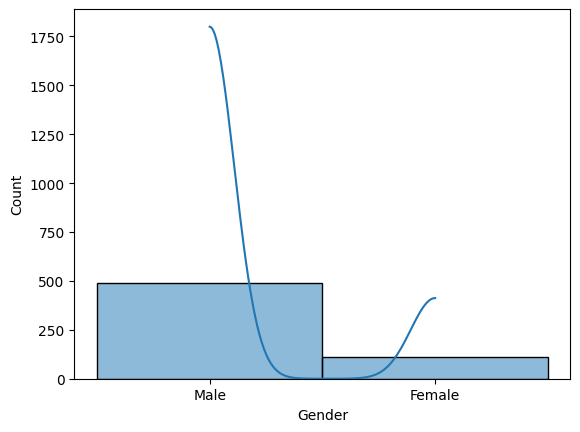

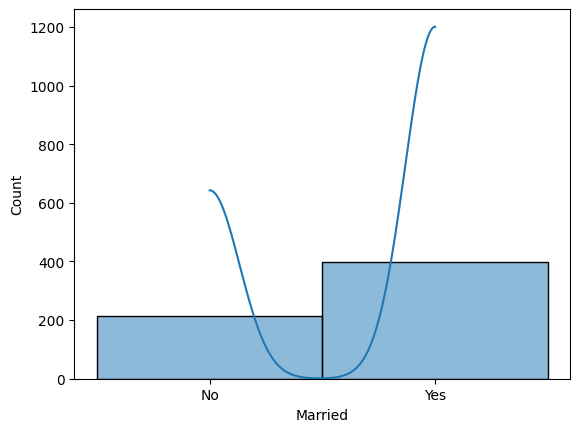

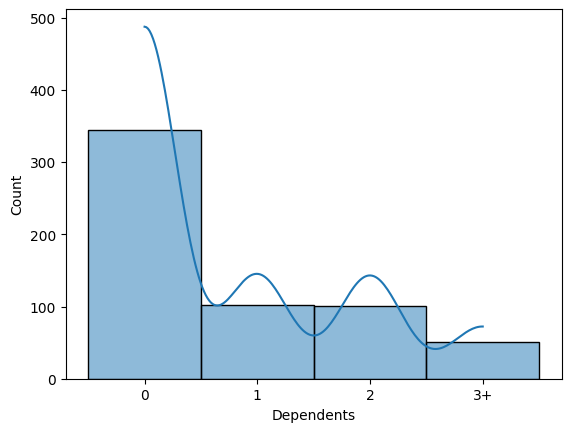

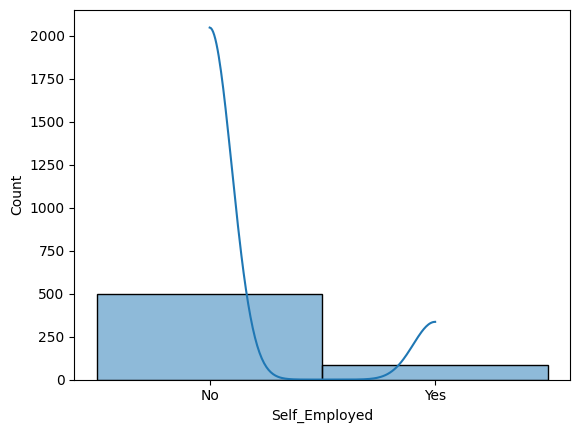

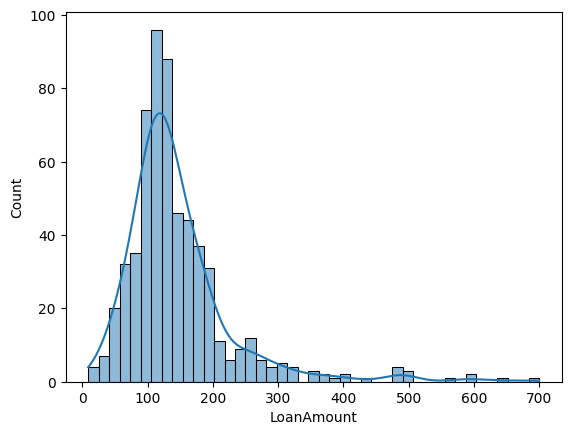

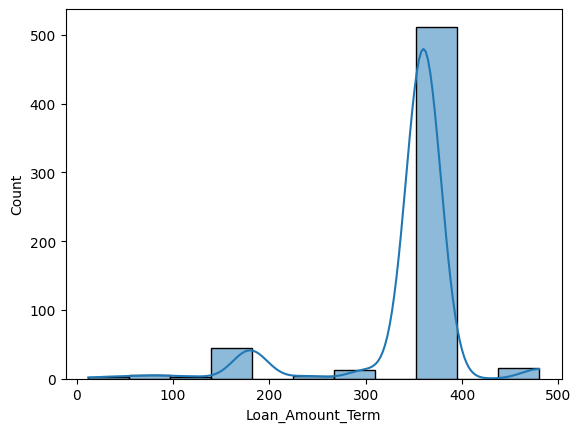

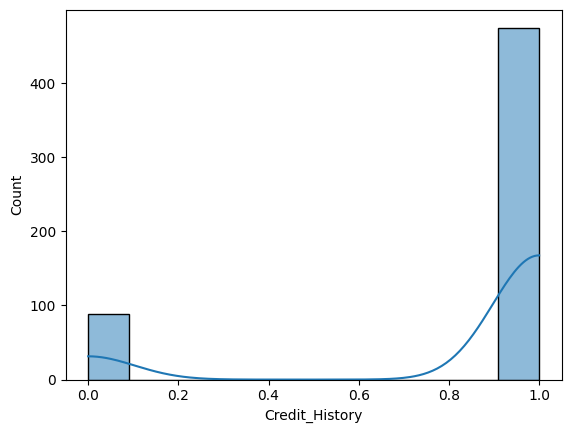

In [11]:
for col in miss_cols:
  plt.figure()
  sns.histplot(df[col],kde=True)

Filling in the missing values

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

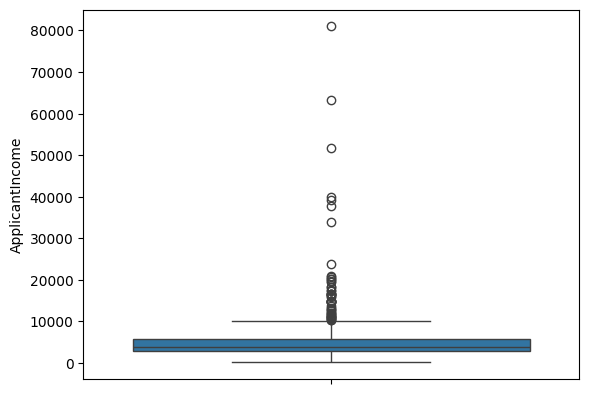

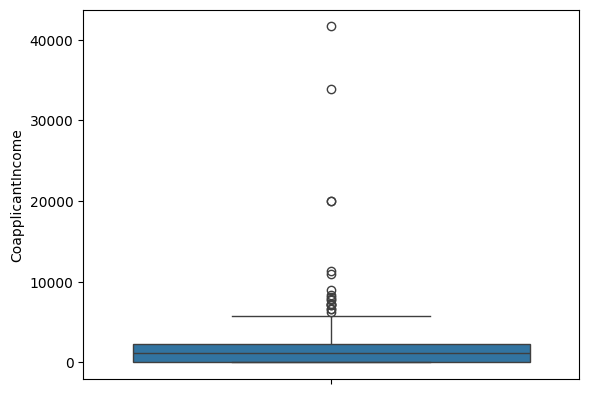

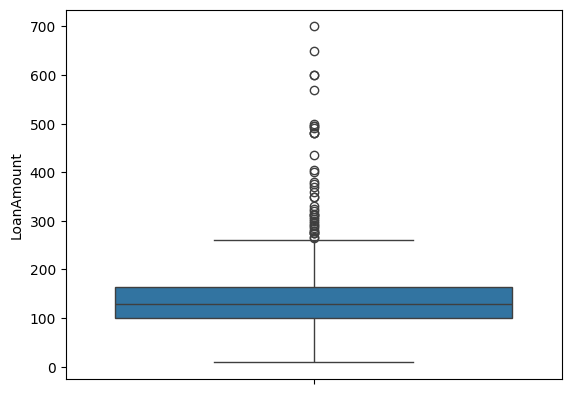

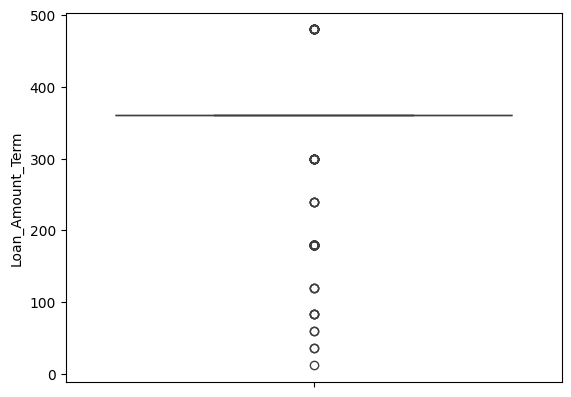

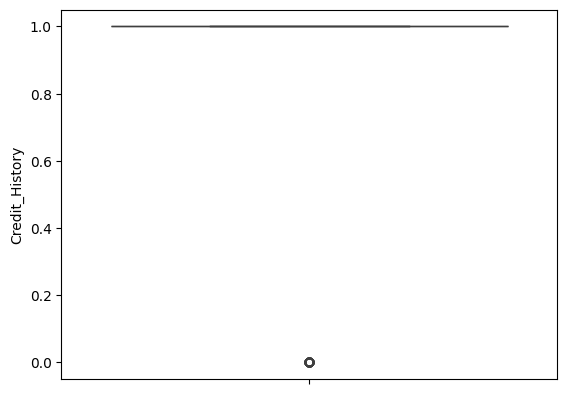

In [14]:
for col in df.columns:
  if df[col].dtype!='object':
    plt.figure()
    sns.boxplot(df[col])

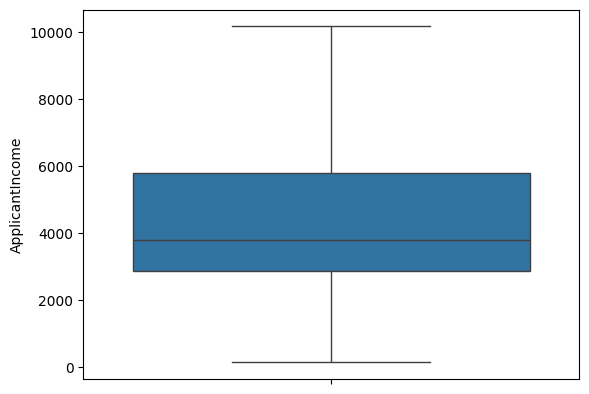

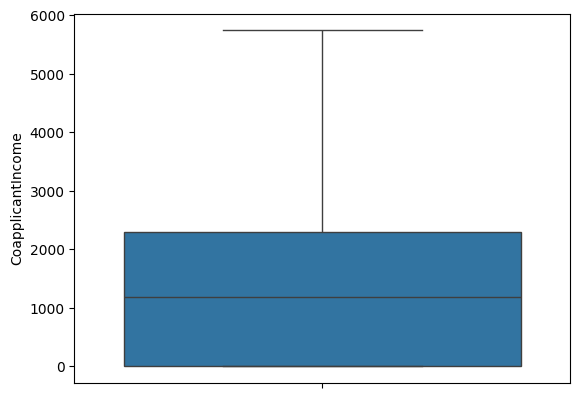

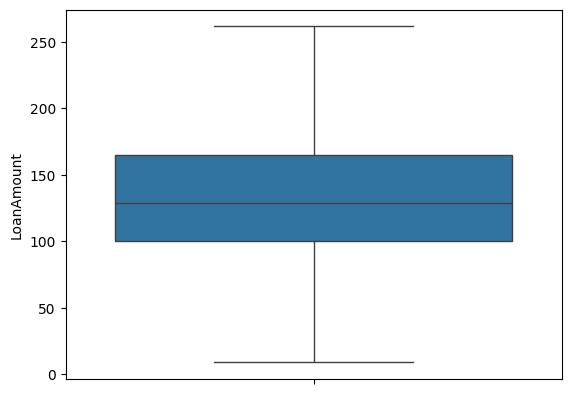

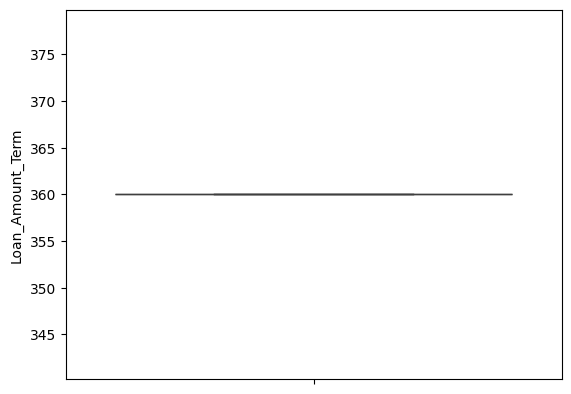

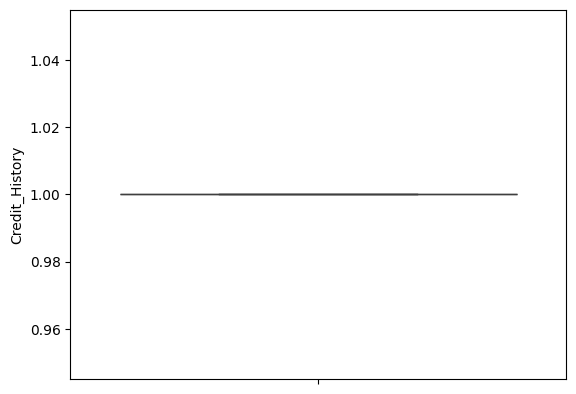

In [15]:
for col in df.columns:
  if df[col].dtype!='object':
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    plt.figure()
    sns.boxplot(df[col])

Outliers have been handled

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [17]:
objcol=df.columns[df.dtypes=='object']
objcol

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
for col in objcol:
  if df[col].dtype=='object':
    print(df[col].unique())

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


ENCODING

Loan ID is an identifier column, not categorical or numerical. It is dropped since it may be noise.

In [21]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=columns_to_encode,dtype=int,drop_first=True)
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849.0,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,1
1,LP001003,1,4583.0,1508.0,128.000000,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000.0,0.0,66.000000,360.0,1.0,1,1,1,0,1,0,1
3,LP001006,0,2583.0,2358.0,120.000000,360.0,1.0,1,1,1,1,0,0,1
4,LP001008,0,6000.0,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,1


In [23]:
df=df.drop('Loan_ID',axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    float64
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int64  
 7   Gender_Male              614 non-null    int64  
 8   Married_Yes              614 non-null    int64  
 9   Education_Not Graduate   614 non-null    int64  
 10  Self_Employed_Yes        614 non-null    int64  
 11  Property_Area_Semiurban  614 non-null    int64  
 12  Property_Area_Urban      614 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


SCALING


In [25]:
corr_matrix=df.corr()
corr_matrix

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Dependents,1.000000,0.111565,-0.031510,0.164333,NaN,NaN,0.010118,0.172914,0.334216,0.055752,0.056798,0.001924,-0.001198
ApplicantIncome,0.111565,1.000000,-0.228956,0.558624,NaN,NaN,-0.000442,0.065040,0.022480,-0.203087,0.237122,-0.016858,-0.015294
CoapplicantIncome,-0.031510,-0.228956,1.000000,0.262322,NaN,NaN,0.011983,0.192438,0.221217,-0.049895,-0.032784,-0.018945,-0.052557
LoanAmount,0.164333,0.558624,0.262322,1.000000,NaN,NaN,-0.052050,0.144853,0.178150,-0.173348,0.114407,0.003834,-0.062424
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_Status,0.010118,-0.000442,0.011983,-0.052050,NaN,NaN,1.000000,0.017987,0.091478,-0.085884,-0.003700,0.136540,-0.043621
Gender_Male,0.172914,0.065040,0.192438,0.144853,NaN,NaN,0.017987,1.000000,0.364569,0.045364,-0.000525,-0.108623,0.034530
Married_Yes,0.334216,0.022480,0.221217,0.178150,NaN,NaN,0.091478,0.364569,1.000000,0.012304,0.004489,0.005845,0.000546
Education_Not Graduate,0.055752,-0.203087,-0.049895,-0.173348,NaN,NaN,-0.085884,0.045364,0.012304,1.000000,-0.010383,-0.039410,-0.034279


In [26]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.497164,-0.874587,0.150494,0.0,0.0,0.674519,0.472343,-1.372089,-0.528362,-0.392601,-0.782016,1.428147
1,0.253470,-0.013767,0.054395,-0.179896,0.0,0.0,-1.482537,0.472343,0.728816,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.737806,-0.652632,-0.874587,-1.292433,0.0,0.0,0.674519,0.472343,0.728816,-0.528362,2.547117,-0.782016,1.428147
3,-0.737806,-0.820924,0.578025,-0.323449,0.0,0.0,0.674519,0.472343,0.728816,1.892641,-0.392601,-0.782016,1.428147
4,-0.737806,0.558104,-0.874587,0.053377,0.0,0.0,0.674519,0.472343,-1.372089,-0.528362,-0.392601,-0.782016,1.428147


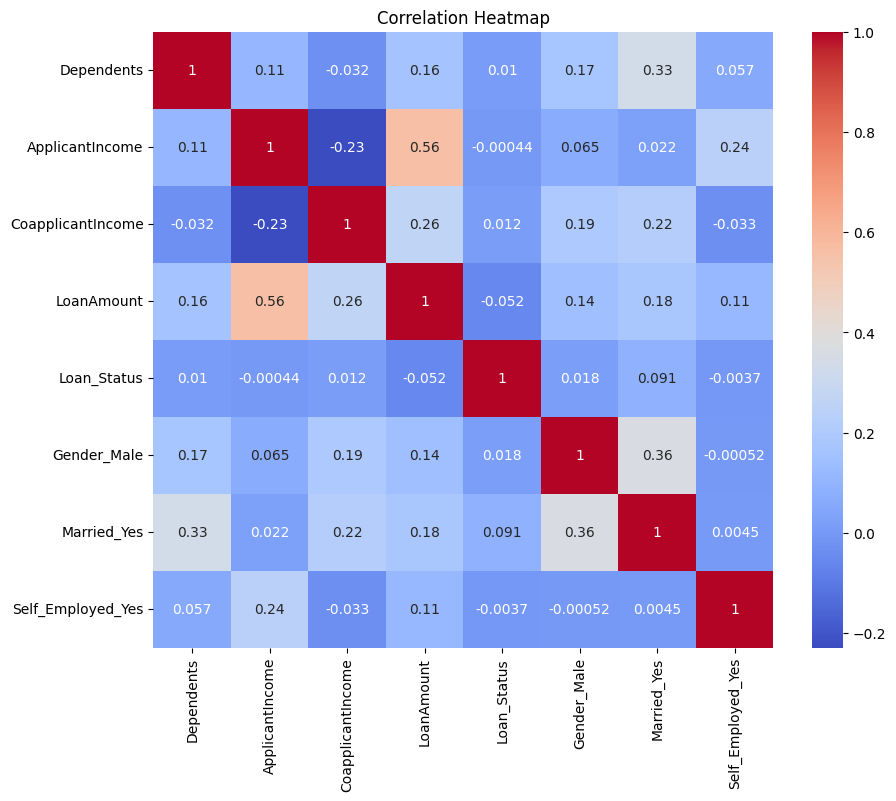

In [30]:
corr_cols=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status','Gender_Male','Married_Yes','Self_Employed_Yes']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()